# Kernel Smoothing

We first load the atmospheric CO2 concentration data and visualize it.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('co2.csv')
data.describe()

,day,lon,lat,co2avgret
count,209631.000000,209631.000000,209631.000000,209631.000000
mean,7.970515,-13.392010,1.924313,375.450064
std,4.327716,100.348843,33.540754,3.772894
min,1.000000,-180.000000,-60.000000,347.792000
25%,4.000000,-100.220000,-25.120000,373.097000
50%,8.000000,-18.570000,-4.390000,375.057000
75%,12.000000,62.470000,27.380000,377.737000
max,15.000000,180.000000,89.140000,403.654000


## Visualize Original Data

Below is a **scatter plot** where the color indicates CO2 concentration. I tried to plot something closed to a heatmap. To that end, I considered using `numpy.meshgrid` and generating intensity using CO2 concentration on each of the tiles of the grid. However, this takes too much time and space due to the scale of the data.

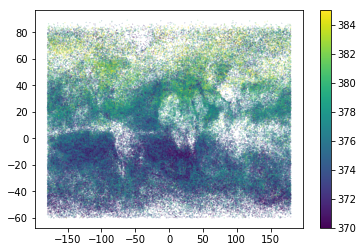

In [29]:
x = data['lon'].values
y = data['lat'].values
z = data['co2avgret'].values
plt.scatter(x, y, c=z, s = 0.01,vmin=370, vmax=385)
plt.colorbar()
plt.show()

## Visualize Smoothed Data

We use the Gaussian kernel to perform smoothing. The next plot shows the smoothed data. Note that we use the **same colormap** for the two scatter plots. 

In [25]:
N = len(x)
b = 10 #bandwidth parameter, the smaller the more concentrated the kernel density is
z_smoothed = np.zeros((N,1))
for i in range(N):
    w = 1/b * np.exp(-((x - x[i])**2 + (y-y[i])**2)/(2*b*b))
    z_smoothed[i] = np.inner(w, z) / sum(w)

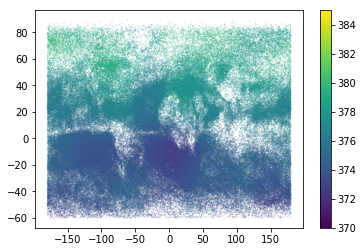

In [28]:
plt.scatter(x, y, c=z_smoothed.flatten(), s = 0.01, vmin=370, vmax=385)
plt.colorbar()
plt.show()

## Notes

* The simple algorithm I use for Gaussian smoothing has a time complexity of $O(N^2)$. There are algorithms that are asymptotically faster. If the input data are pixels in an image (thus located in a 2D grid), there is an [$O(N)$ algorithm](https://computergraphics.stackexchange.com/questions/39/how-is-gaussian-blur-implemented).

* In addition, the data are defined on a spherical space rather than an Euclidian space. The distance should be defined accordingly.

* We can choose the value of $b$ through cross validation. We set aside some points as validation set. We use data in the training set to predict (via interpolation) the concentration value for each point in the validation set. We may use mean squared error as our metric.